와인 종류 구분하기
- 레드와인 샘플 1,599개와 화이트와인 샘플 4,898개의 데이터
- 산도, 맛, 등급 등의 정보를 이용하여 레드 또는 화이트 와인을 구분하기


In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)

In [2]:
df = pd.read_csv('wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df = df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3987,7.6,0.21,0.35,1.2,0.041,7.0,106.0,0.99140,3.06,0.45,11.3,4,0
6017,6.6,0.22,0.23,17.3,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,6,0
4445,6.9,0.15,0.29,2.3,0.033,14.0,82.0,0.99132,3.10,0.58,11.2,7,0
4712,6.5,0.24,0.39,17.3,0.052,22.0,126.0,0.99888,3.11,0.47,9.2,6,0
1216,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 968 to 6206
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.shape, y.shape

((6497, 12), (6497,))

In [12]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2 , random_state = 42)

In [16]:
X_train[11].unique(), X_test[11].unique()

(array([5, 7, 6, 4, 8, 3, 9], dtype=int64),
 array([6, 7, 5, 4, 8, 3, 9], dtype=int64))

In [17]:
from keras.models import Sequential
from keras.layers import  Dense, Input

In [20]:
model = Sequential()
model.add(Input((12,)))
model.add(Dense(32,activation = 'relu', input_shape = (12,)))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=32,
                    validation_split=0.2)

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(val_acc)

[0.8971154093742371, 0.9288461804389954, 0.9355769157409668, 0.9375, 0.9375, 0.9394230842590332, 0.9413461685180664, 0.9384615421295166, 0.9451923370361328, 0.9461538195610046, 0.949999988079071, 0.949999988079071, 0.9461538195610046, 0.9509615302085876, 0.9596154093742371, 0.9634615182876587, 0.9576923251152039, 0.9692307710647583, 0.9682692289352417, 0.9576923251152039, 0.9624999761581421, 0.9528846144676208, 0.9711538553237915, 0.9451923370361328, 0.9740384817123413, 0.9624999761581421, 0.9624999761581421, 0.9711538553237915, 0.9644230604171753, 0.9711538553237915, 0.9634615182876587, 0.9711538553237915, 0.9711538553237915, 0.9663461446762085, 0.9740384817123413, 0.9759615659713745, 0.9769230484962463, 0.9778845906257629, 0.9682692289352417, 0.9682692289352417, 0.9711538553237915, 0.9769230484962463, 0.9701923131942749, 0.9778845906257629, 0.9750000238418579, 0.9778845906257629, 0.9701923131942749, 0.9682692289352417, 0.9721153974533081, 0.9807692170143127, 0.982692301273346, 0.9701

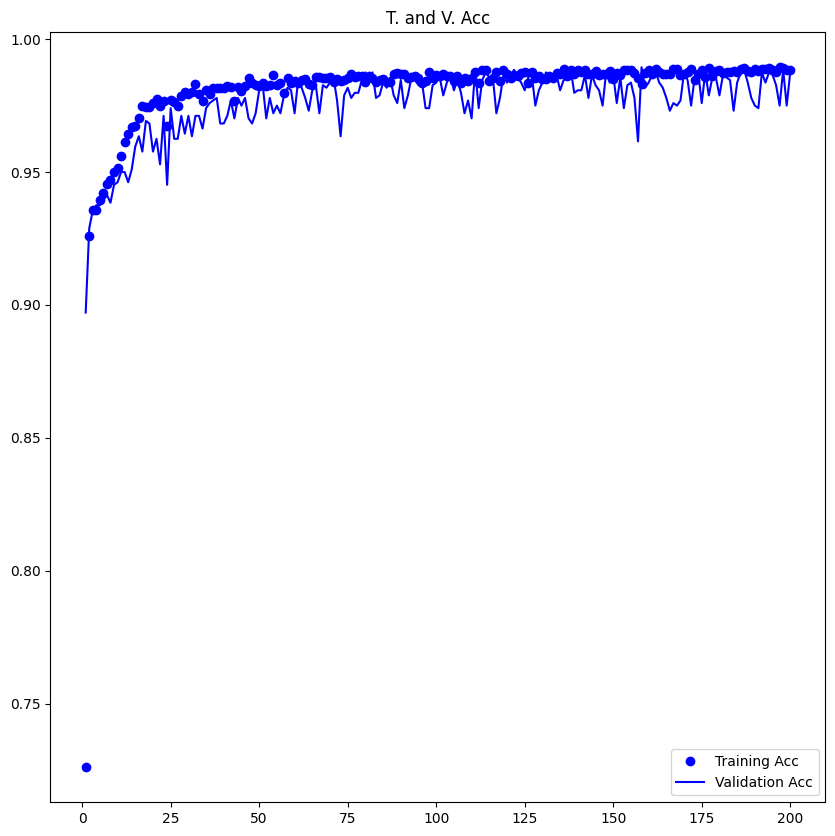

In [33]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('T. and V. Acc')
plt.legend()
plt.show()

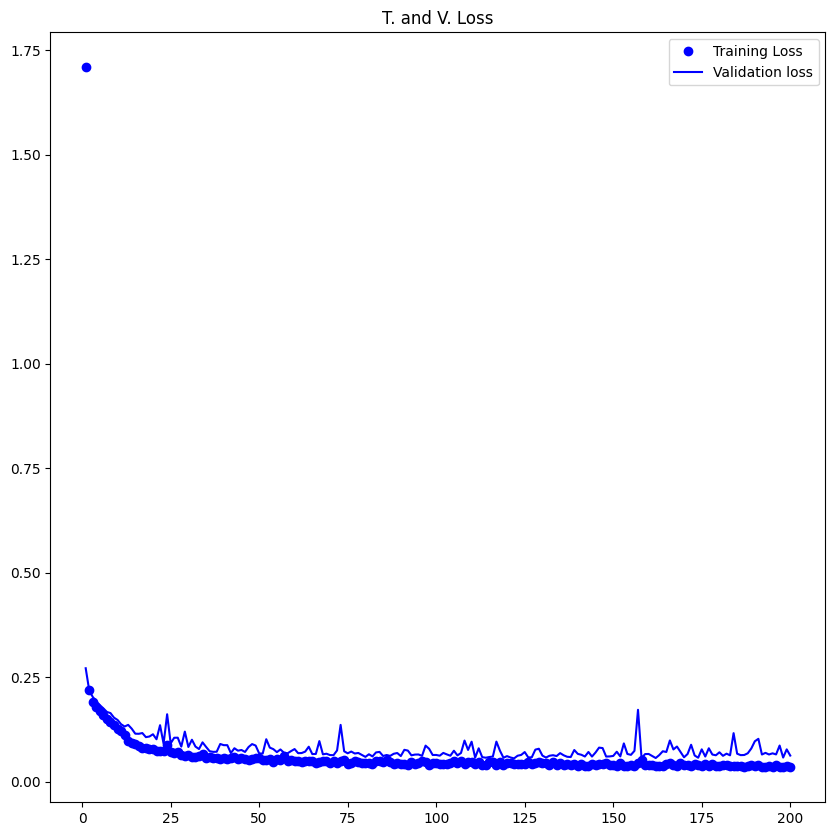

In [34]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('T. and V. Loss')
plt.legend()
plt.show()

In [35]:
evaluation = model.evaluate(X_test,y_test)
print(f'loss : {evaluation[0]}')
print(f'acc : {evaluation[1]}')

41/41 [==============================] - 0s 1ms/step - loss: 0.0795 - acc: 0.9885
loss : 0.0794980451464653
acc : 0.9884615540504456


In [41]:
model_dir = os.path.join(path,'models')
# if not os.path.exists(model_dir):
#     os.mkdir(model_dir)
model.save(os.path.join(model_dir,'wine.h5'))

In [53]:
modelpath = os.path.join(model_dir, '{epoch:d}-{val_loss:.4f}_wine.keras')
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath=modelpath,  
                               monitor = 'val_loss', 
                               verbose=1,
                               save_best_only = True
                               )

model.fit(X_train, y_train, 
          epochs=200, 
          batch_size=32, 
          validation_split=0.2, 
          verbose=1,
          callbacks = [checkpointer]
          )

Epoch 1/200
  1/130 [..............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 97/130 [=====================>........] - ETA: 0s - loss: 0.0175 - acc: 0.9939
Epoch 1: val_loss improved from inf to 0.09889, saving model to D:\elice_python\GAS_5\pytest\models\1-0.0989_wine.keras
130/130 [==============================] - 0s 2ms/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.0989 - val_acc: 0.9885
Epoch 2/200
124/130 [===========================>..] - ETA: 0s - loss: 0.0208 - acc: 0.9917
Epoch 2: val_loss did not improve from 0.09889
130/130 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.9921 - val_loss: 0.1018 - val_acc: 0.9894
Epoch 3/200
106/130 [=======================>......] - ETA: 0s - loss: 0.0202 - acc: 0.9932
Epoch 3: val_loss improved from 0.09889 to 0.09482, saving model to D:\elice_python\GAS_5\pytest\models\3-0.0948_wine.keras
130/130 [==============================] - 0s 2ms/step - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0948 - val_acc: 0.9885
Epoch 4/200
115/130 [=========================>....] - ETA: 0s - loss: 0.0191 - ac

In [55]:
from tensorflow.keras.models import load_model
best_model_name = '67-0.0776_wine.keras'
loaded_model = load_model(os.path.join(model_dir, best_model_name))
# loaded_model.predict = (X_test)
loaded_model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.1181 - acc: 0.9900


[0.11811469495296478, 0.9900000095367432]